# Twitter NLP

In [1]:
import pandas as ps
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from langdetect import detect
import re
import string
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

stop_words = set(stopwords.words('english'))
stop_words.update(['the', 'march8th','iwd2021', 'r', '19th\'', '8th', 'march'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vilhelmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vilhelmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Vilhelmi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vilhelmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vilhelmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#NOTE: possible columns: ['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates', 'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'from_user_id_str', 'in_reply_to_status_id_str', 'source', 'profile_image_url', 'user_followers_count', 'user_friends_count', 'user_location', 'status_url', 'entities_str']

columns = [
    'id_str',
    'from_user',
    'text']

df = ps.read_excel('twitter_data.xlsx', 'Archive', engine='openpyxl', usecols=columns)
df.head()

,id_str,from_user,text
0,1367988166301413376,AbrehaAyda,RT @EriZara3: The #Eritrean woman:\nShe is a #...
1,1367987945974751234,DenisaMansfield,Late night painting to this song 🎨❤️‍🔥\n\nhttp...
2,1367987741317689344,Sumit_Sangwan20,RT @yogitabhayana: क्यू ना महिला दिवस के दिन स...
3,1367987628860055556,waqasshkh,RT @PizzaHutIN: #FREEMEAL \nKick off the #Wome...
4,1367987270855368704,massacre_1988,RT @FatemehF45: Join us for an online conferen...


In [3]:
def preprocess_tweet_text(tweet):
    tweet = tweet.lower()
    # Remove urls
    tweet = re.sub(r'http\S+|www\S+|https\S+rt\S+RT\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove unicode
    tweet = (tweet.encode('ascii', 'ignore')).decode('utf-8')
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    words = set(nltk.corpus.words.words())
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    filtered_words = [w for w in filtered_words if w.lower() in words or not w.isalpha()]
    
    return " ".join(filtered_words)

In [4]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


In [5]:
# Clean data

df = df.dropna(axis=0, thresh=2)
df = df[0:500]

df.text = df.text.apply(preprocess_tweet_text)
df.text = df.text.apply(deEmojify)

In [6]:
original_df = df

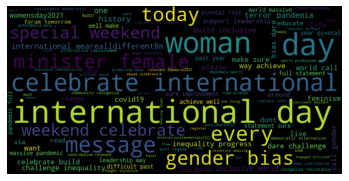

<Figure size 1200x800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['https', 't', 'a', 'in', 'my', 'the', 'co', 'i', 'to', 'and','of', 'Shakuntala', 'msvgo', 'contest', 'giveway', 'Giveaway', 'with', 'C', 'me', 'is', 'for', 'all', 'Join', 'your', 'WomensDay', 'you', 'that', 'contestalert', 'this', 'RT'])
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, min_word_length=3, min_font_size=8).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(dpi=200)
plt.show()
plt.savefig('wordcloud3.png')

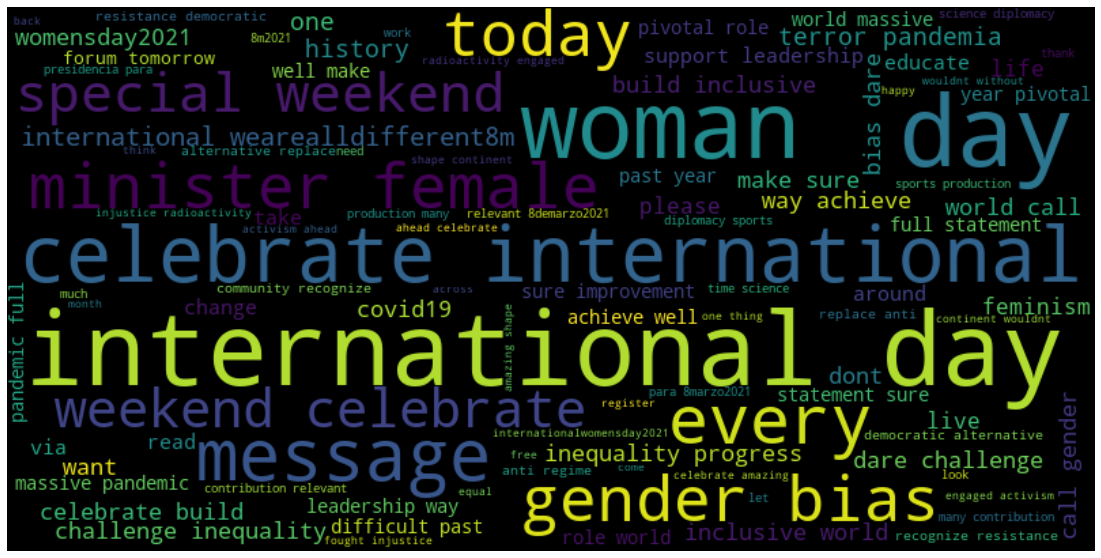

<Figure size 20000x10000 with 0 Axes>

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10), dpi=1000)

plt.savefig('wordcloud4.png')
plt.show()

In [9]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in df.text:
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, len(df))
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))
polarity = percentage(polarity, len(df))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [10]:
tweet_list = ps.DataFrame(tweet_list)
neutral_list = ps.DataFrame(neutral_list)
negative_list = ps.DataFrame(negative_list)
positive_list = ps.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  500
positive number:  229
negative number:  52
neutral number:  219


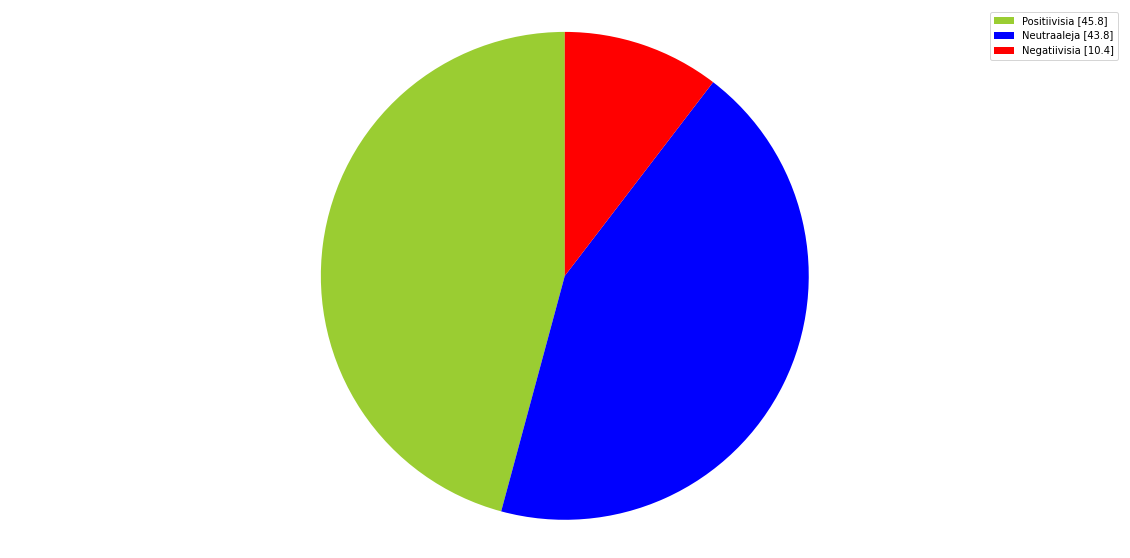

In [11]:
# Piechart

labels = ['Positiivisia [%s]' % positive, 'Neutraaleja [%s]' % neutral, 'Negatiivisia [%s]' % negative]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.rcParams['figure.figsize'] = [4, 2]
plt.style.use('default')
plt.legend(labels)
plt.axis('equal')
plt.savefig('piechart2.png')
plt.show()

In [12]:
# Cleaning Text (RT, Punctuation etc)#Creating new dataframe and new features
tw_list = ps.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
tw_list.head()

,0,text
0,woman freedom fighter equal independence,woman freedom fighter equal independence
1,late night painting song music music female ar...,late night painting song music music female ar...
2,,
3,kick weekend woman always got back win free do...,kick weekend woman always got back win free do...
4,join us conference occasion 8 2021 1500 cest f...,join us conference occasion 8 2021 1500 cest f...


In [13]:
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: ps.Series(TextBlob(Text).sentiment))
for index, row in tw_list.text.iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,woman freedom fighter equal independence,woman freedom fighter equal independence,0.000000,0.250000,positive,0.000,0.341,0.659,0.7003
1,late night painting song music music female ar...,late night painting song music music female ar...,-0.150000,0.383333,neutral,0.000,1.000,0.000,0.0000
2,,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
3,kick weekend woman always got back win free do...,kick weekend woman always got back win free do...,0.391667,0.427778,positive,0.000,0.387,0.613,0.9618
4,join us conference occasion 8 2021 1500 cest f...,join us conference occasion 8 2021 1500 cest f...,0.000000,0.000000,positive,0.000,0.556,0.444,0.7506
5,story 100000 legal immigrant stuck long despit...,story 100000 legal immigrant stuck long despit...,0.116667,0.266667,negative,0.351,0.487,0.162,-0.5405
6,reformer educator hansa widely making signific...,reformer educator hansa widely making signific...,0.119444,0.397222,positive,0.000,0.682,0.318,0.8126
7,take challenge show us style best stand chance...,take challenge show us style best stand chance...,0.900000,0.350000,positive,0.000,0.443,0.557,0.8834
8,needs representation needs equality important ...,needs representation needs equality important ...,0.500000,0.950000,positive,0.000,0.616,0.384,0.6808
9,fact equal benefit men another fact every man ...,fact equal benefit men another fact every man ...,0.000000,0.250000,positive,0.000,0.637,0.363,0.6908


In [14]:
# Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [15]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return ps.concat([total,percentage],axis=1,keys=['Total','Percentage'])

# Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,229,45.8
neutral,219,43.8
negative,52,10.4


In [16]:
def create_wordcloud(text, fileName, m_wordLength=2):
    stopwords = set(STOPWORDS)
    stopwords.update(['https', 't', 'a', 'in', 'my', 'the', 'co', 'i', 'to', 'and','of', 'Shakuntala', 'msvgo', 'contest', 'giveway', 'Giveaway', 'with', 'C', 'me', 'is', 'for', 'all', 'Join', 'your', 'WomensDay', 'RT','IWD2021', 'March', 'Mar', '8th', 'March\'', 'IWD2021\''])
    plt.rcParams['figure.figsize'] = [20, 10]
    wc = WordCloud(background_color='white', max_words=200, min_word_length=m_wordLength, stopwords=stopwords, repeat=True, width=2000, height=1000)
    wc.generate(str(text))
    wc.to_file(fileName)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure(figsize=(20,10), dpi=1000)
    plt.show()

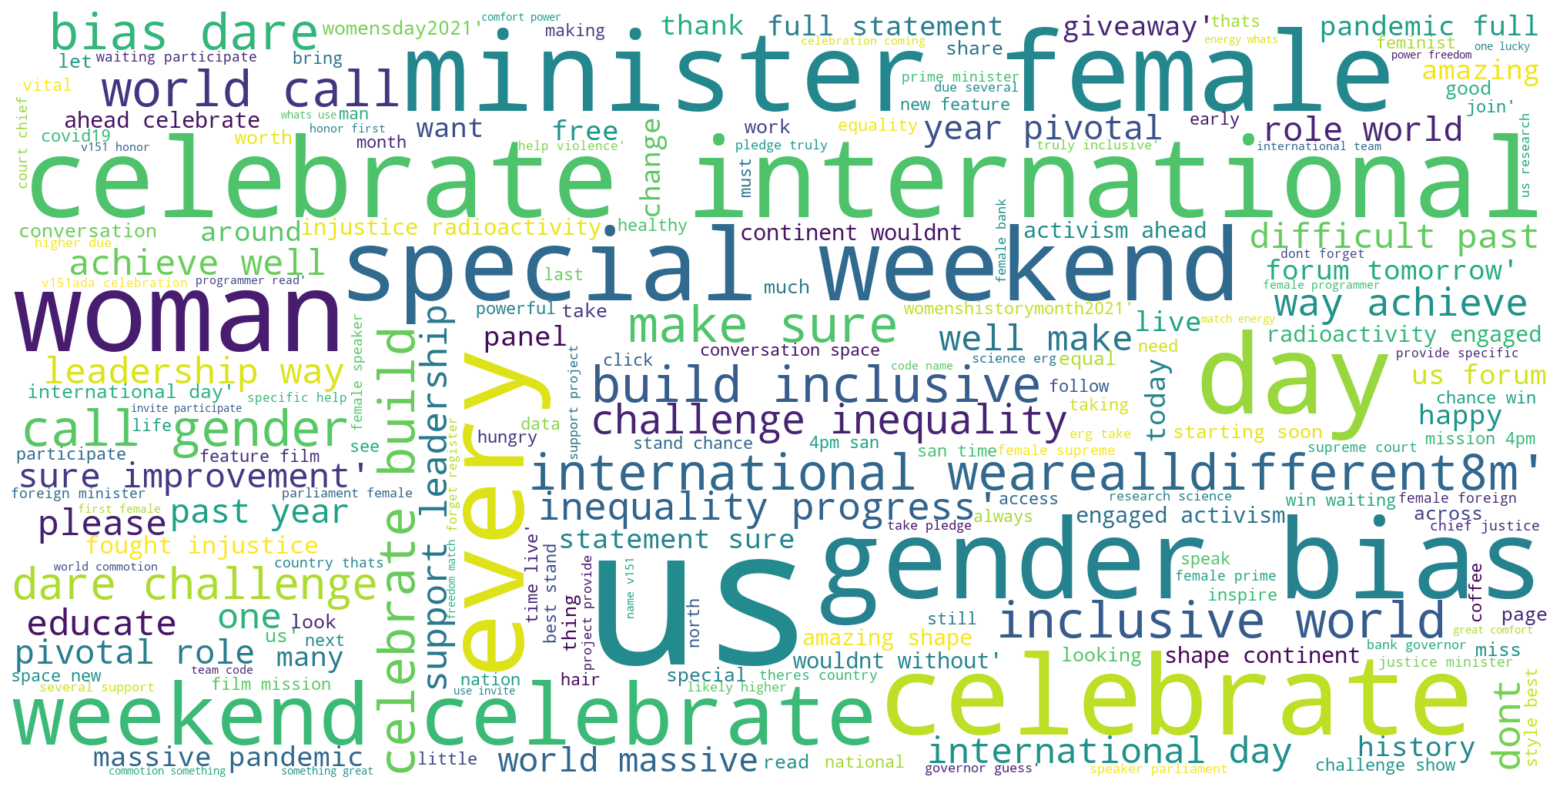

<Figure size 20000x10000 with 0 Axes>

In [17]:
# Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values, 'positive_wordcloud5.png')

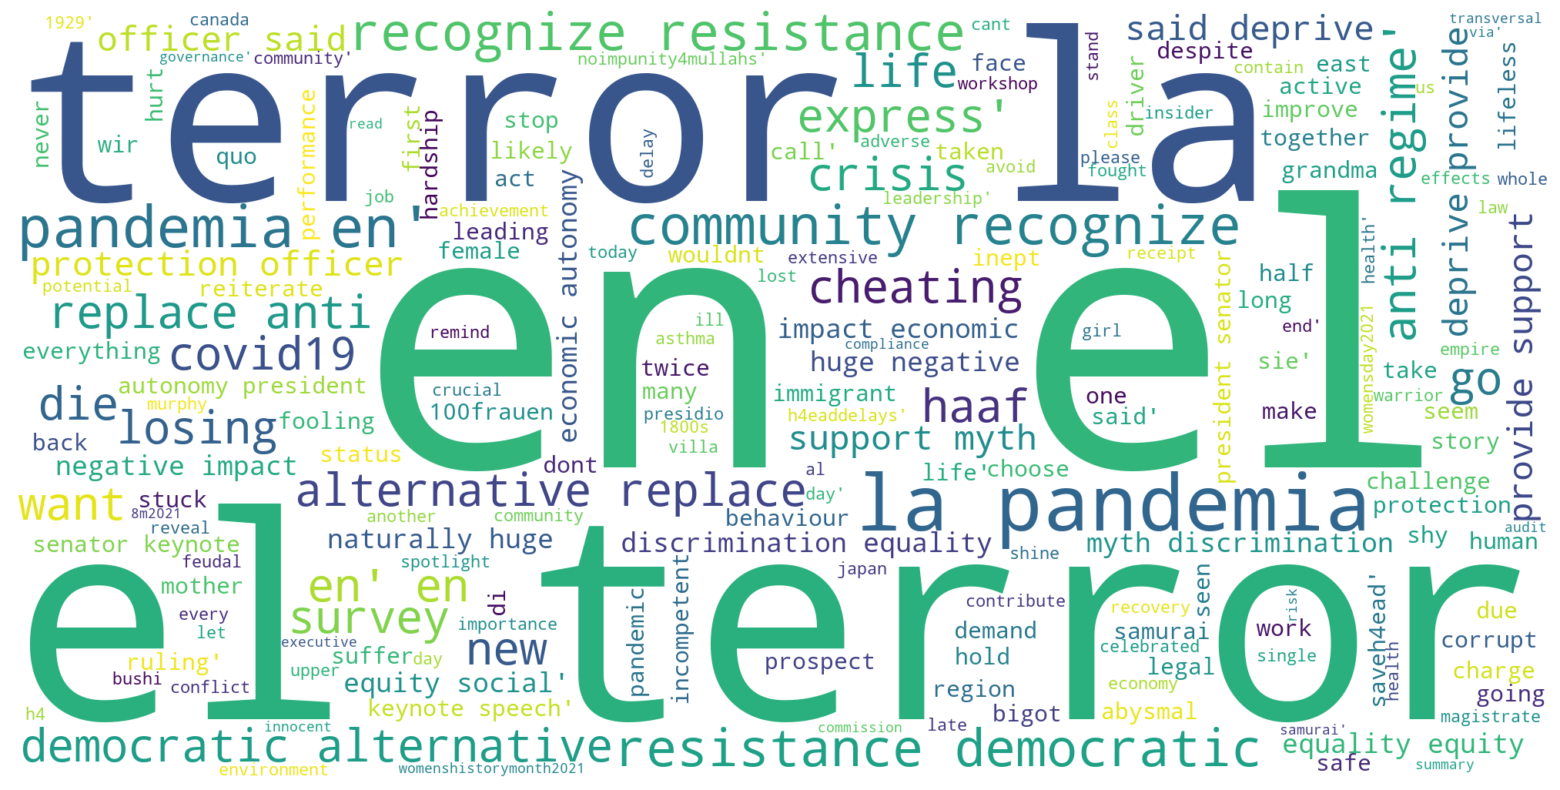

<Figure size 20000x10000 with 0 Axes>

In [18]:
# Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values, 'negative_wordcloud5.png')

In [ ]:
# Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral['text'].values, 'neutral_wordcloud4.png')

In [ ]:
def func(text):
    text = word_tokenize(text)
    stop_words.update(['r', '19th\'', 'c', 'la', 'el', '22hd', 'en'])
    filtered_words = filtered_words = [w for w in text if not w in stop_words]

    return " ".join(filtered_words)

In [ ]:
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

tweets_pos = tw_list_positive.text.apply(func)
tweets_neu = tw_list_neutral.text.apply(func)
tweets_neg = tw_list_negative.text.apply(func)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# The vectorizer object will be used to transform text to vector form
vectorizer_pos = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')
vectorizer_neu = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')
vectorizer_neg = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')

# Apply transformation
tf_pos = vectorizer_pos.fit_transform(tweets_pos).toarray()
tf_neu = vectorizer_neu.fit_transform(tweets_neu).toarray()
tf_neg = vectorizer_neg.fit_transform(tweets_neg).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names_pos = vectorizer_pos.get_feature_names()
tf_feature_names_neu = vectorizer_neu.get_feature_names()
tf_feature_names_neg = vectorizer_neg.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 7
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
pos_model = model.fit(tf_pos)
neu_model = model.fit(tf_neu)
neg_model = model.fit(tf_neg)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Aiheen %d sanat" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Aiheen %d painoarvo" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return ps.DataFrame(topic_dict)

In [ ]:
no_top_words = 5
display_topics(pos_model, tf_feature_names_pos, no_top_words)

In [ ]:
table = display_topics(neg_model, tf_feature_names_neg, no_top_words)
display(HTML(table.to_html()))

In [ ]:
display_topics(neu_model, tf_feature_names_neu, no_top_words)

In [ ]:
def lemmatizer(text):
    text = word_tokenize(text)
    pst = PorterStemmer()
    stemmed_words = [pst.stem(w) for w in text]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    return " ".join(lemma_words)

In [ ]:
lem_tweets_pos = tweets_pos.apply(lemmatizer)
lem_tweets_neu = tweets_neu.apply(lemmatizer)
lem_tweets_neg = tweets_neg.apply(lemmatizer)

In [ ]:
# The vectorizer object will be used to transform text to vector form
vectorizer_pos = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')
vectorizer_neu = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')
vectorizer_neg = CountVectorizer(max_df=0.90, min_df=10, token_pattern='\w+|\$[\d\.]+|\S+')

# Apply transformation
tf_pos = vectorizer_pos.fit_transform(lem_tweets_pos).toarray()
tf_neu = vectorizer_neu.fit_transform(lem_tweets_neu).toarray()
tf_neg = vectorizer_neg.fit_transform(lem_tweets_neg).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names_pos = vectorizer_pos.get_feature_names()
tf_feature_names_neu = vectorizer_neu.get_feature_names()
tf_feature_names_neg = vectorizer_neg.get_feature_names()

In [ ]:
number_of_topics = 7
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
pos_model = model.fit(tf_pos)
neu_model = model.fit(tf_neu)
neg_model = model.fit(tf_neg)

In [ ]:
no_top_words = 5
display_topics(pos_model, tf_feature_names_pos, no_top_words)

In [ ]:
display_topics(neu_model, tf_feature_names_neu, no_top_words)

In [ ]:
display_topics(neg_model, tf_feature_names_neg, no_top_words)